In [1]:
from sklearn.datasets import fetch_openml
import numpy as np

In [2]:
mnist = fetch_openml('mnist_784')

In [7]:
x, y = np.array(mnist['data']), np.array(mnist['target'])

In [9]:
x.shape

(70000, 784)

In [11]:
y.shape

(70000,)

In [12]:
%matplotlib inline

In [13]:
import matplotlib
import matplotlib.pyplot as plt

In [54]:
some_digit = x[36001]
some_digit_image = some_digit.reshape(28, 28) #this is to make 28pixel*28pixel image

(-0.5, 27.5, 27.5, -0.5)

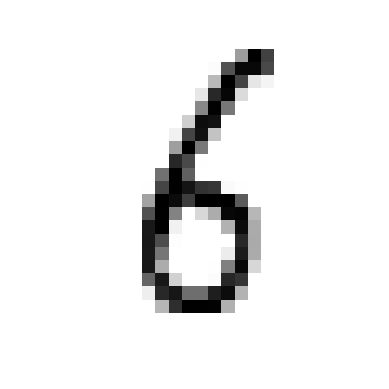

In [21]:
plt.imshow(some_digit_image, cmap=matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")

In [22]:
y[36002]

'6'

In [23]:
x_train, x_test = x[:60000], x[60000:]

In [24]:
y_train, y_test = y[:60000], y[60000:]

# Random shuffling so that no digit should get filtered from training

In [26]:
shuffled_index = np.random.permutation(60000)
x_train, y_train = x_train[shuffled_index], y_train[shuffled_index]

# Creating a 2 detector

In [34]:
y_train = y_train.astype(np.int8)
y_test = y_test.astype(np.int8)
#Above code will convert string arrays to int arrays
y_train_2 = (y_train==2)
y_test_2 = (y_test==2)


In [35]:
y_test_2

array([False,  True, False, ..., False, False, False])

In [46]:
from sklearn.linear_model import LogisticRegression

In [51]:
clf = LogisticRegression(solver='lbfgs', max_iter=100)  #Use tol=0.1 if loading takes time

In [52]:
clf.fit(x_train, y_train_2)

c:\machine learning\venv\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [55]:
clf.predict([some_digit])

array([ True])

In [56]:
from sklearn.model_selection import cross_val_score

In [57]:
cross_val_score(clf, x_train, y_train_2, cv=3, scoring="accuracy")

c:\machine learning\venv\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\machine learning\venv\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

array([0.97895, 0.97785, 0.97755])